In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1️⃣ Load MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2️⃣ Preprocessing
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize (0-1)
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape for CNN
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)  # Convert labels to one-hot encoding
y_test = to_categorical(y_test, 10)

# 3️⃣ Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),  # Reduces overfitting
    layers.Dense(10, activation="softmax")  # Output layer
])

# 4️⃣ Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 5️⃣ Train Model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 6️⃣ Save Model
model.save("mnist_model.h5")
print("✅ Model saved as mnist_model.h5 with high accuracy!")


C:\Users\adeel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.8773 - loss: 0.3910 - val_accuracy: 0.9868 - val_loss: 0.0386
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9848 - loss: 0.0508 - val_accuracy: 0.9912 - val_loss: 0.0280
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9895 - loss: 0.0348 - val_accuracy: 0.9889 - val_loss: 0.0380
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9910 - val_loss: 0.0280
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9918 - val_loss: 0.0259
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9939 - loss: 0.0181 - val_accuracy: 0.9925 - val_loss: 0.0267
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9947 - loss: 0.0143 - val_accuracy: 0.9922 - val_loss: 0.0328
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9959 - loss: 0.0118 - 

✅ Model saved as mnist_model.h5 with high accuracy!


In [2]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(9, activation='softmax')  # Output layer with 9 classes (1-9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\adeel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,905 (878.54 KB)

 Trainable params: 224,905 (878.54 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9089 - loss: 0.2926 - val_accuracy: 0.9868 - val_loss: 0.0437
Epoch 2/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9869 - loss: 0.0424 - val_accuracy: 0.9865 - val_loss: 0.0380
Epoch 3/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9870 - val_loss: 0.0408
Epoch 4/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9892 - val_loss: 0.0320
Epoch 5/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9954 - loss: 0.0158 - val_accuracy: 0.9897 - val_loss: 0.0360
Epoch 6/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9921 - val_loss: 0.0272
Epoch 7/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9921 - val_loss: 0.0323
Epoch 8/10
1690/1690 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9976 -

In [4]:
def predict_number(image_path):
    from PIL import Image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to MNIST size
    img_array = np.array(img) / 255.0  # Normalize
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model

    predictions = model.predict(img_array)
    probabilities = {i+1: prob for i, prob in enumerate(predictions[0])}

    return probabilities

# Example usage
image_path = "7.jpg"  # Provide an image path
probabilities = predict_number(image_path)
print(probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
{1: 3.1287123e-05, 2: 0.8438893, 3: 7.870053e-09, 4: 0.00017678228, 5: 5.6603215e-09, 6: 2.207851e-08, 7: 0.15576954, 8: 0.00013306511, 9: 4.5709353e-10}


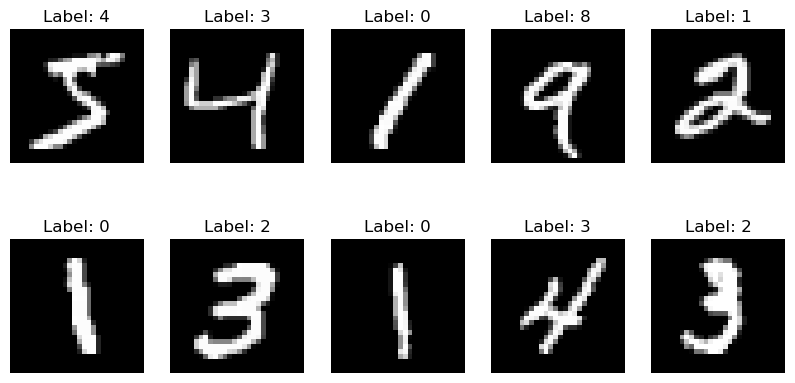

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with labels
def plot_images_with_labels(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))  # Set figure size
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # Create subplots (2 rows, 5 columns)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")  # Show image
        plt.title(f"Label: {labels[i]}")  # Show label as title
        plt.axis("off")  # Hide axes
    plt.show()

# Show first 10 images with labels
plot_images_with_labels(x_train, y_train, num_images=10)


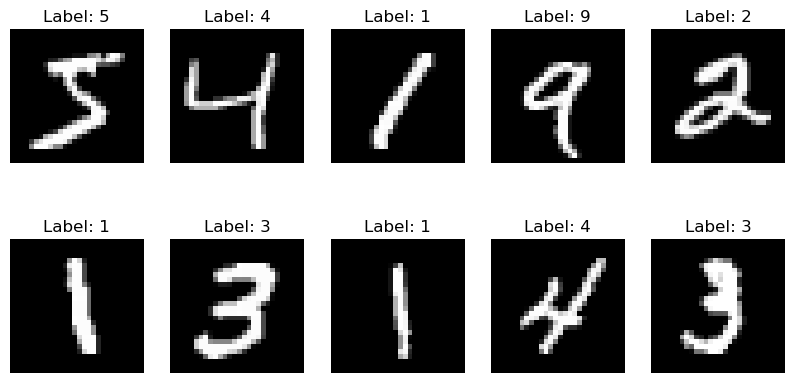

In [6]:
def plot_images_with_labels(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.title(f"Label: {labels[i] + 1}")  # Add 1 back for correct display
        plt.axis("off")
    plt.show()

# Display first 10 images correctly labeled (1-9)
plot_images_with_labels(x_train, y_train, num_images=10)


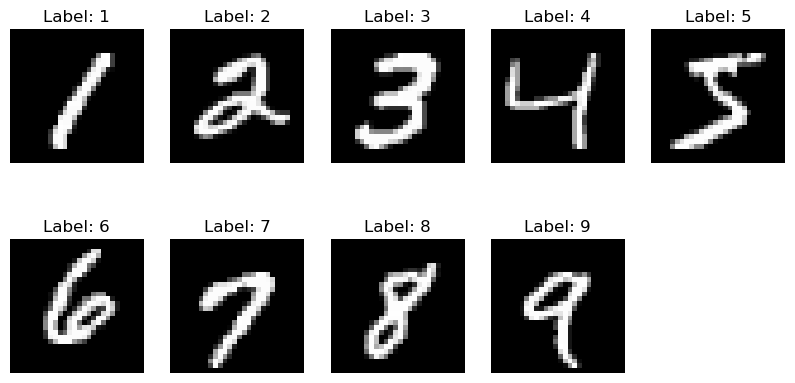

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display unique digits
def plot_unique_digits(images, labels):
    unique_digits = {}  # Dictionary to store one sample per digit

    for i in range(len(labels)):
        digit = labels[i]
        if digit not in unique_digits:
            unique_digits[digit] = images[i]  # Store the first occurrence of each digit

        if len(unique_digits) == 9:  # Stop when we have all 9 digits
            break

    # Plot the unique digits
    plt.figure(figsize=(10, 5))
    for i, (digit, img) in enumerate(sorted(unique_digits.items())):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.reshape(28, 28), cmap="gray")
        plt.title(f"Label: {digit + 1}")  # Add 1 to match original label range
        plt.axis("off")

    plt.show()

# Call the function to display unique numbers (1-9)
plot_unique_digits(x_train, y_train)


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_number(img_path, model):
    # Load the image
    img = image.load_img(img_path, color_mode="grayscale", target_size=(28, 28))

    # Convert image to array
    img_array = image.img_to_array(img)

    # Normalize and reshape for the model
    img_array = img_array / 255.0  # Scale pixel values (0-1)
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for CNN

    # Make prediction
    predictions = model.predict(img_array)

    # Convert predictions to probability dictionary
    probabilities = {i+1: prob for i, prob in enumerate(predictions[0])}

    # Show the image
    plt.imshow(img_array.reshape(28, 28), cmap="gray")
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    return probabilities


In [9]:
import pickle

# Save the trained model
with open("mnist_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("✅ Model saved as mnist_model.pkl")


✅ Model saved as mnist_model.pkl


In [20]:
import tensorflow as tf
model = pickle.load(open("mnist_model.pkl", "rb"))
model.save("mnist_model.h5")


In [3]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load trained model
model = tf.keras.models.load_model("mnist_model.h5")  # Ensure correct model path

# Load image
image_path = "2.png"  # Ensure correct image path
img = Image.open(image_path).convert("L")  # Convert to grayscale
img = img.resize((28, 28))  # Resize to MNIST format

# Convert to NumPy array
img_array = np.array(img)
img_array = 255 - img_array  # Invert colors (if needed)
img_array = img_array / 255.0  # Normalize pixel values
img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for CNN model input

# Predict
predictions = model.predict(img_array)
predicted_class = int(np.argmax(predictions))  # Get highest probability class

print(f"Predicted Digit: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Predicted Digit: 5


In [5]:
print(model.input_shape)


(None, 28, 28, 1)
